In [ ]:
import kaggle as kg
import os
import pandas as pd
import numpy as np
import matplotlib as mp
%matplotlib inline

#download_path = "/Users/tayma/datasets" # Windows 
download_path = "/Users/taylormurray/datasets" #MaciOS
file_path = os.path.join(download_path, 'housing.csv') #joins the download_path and 'housing.csv' and returns it as a new path
db = pd.read_csv(file_path)




In [4]:
db.head() #To take a look at the first few instances and their features


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [5]:
db.info() #To get a sense of the contents of the data- in particular its features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

## About the features:

* ``'id'`` - an integer acting as an id number.
* ``'url'`` - the url hosting the listing of the house. 
* ``'region'`` - location of house (usually a city name).
* ``'region_url'`` - the regions craigslist url 
* ``'price'`` - the rent/price *per month* in US dollars for the house.
* ``'type'`` - the type of the house whose values consist of
    - apartment
    - condo
    - house
    - duplex
    - townhouse
    - loft
    - manufactured
    - cottage/cabin
    - flat
    - in-law
    - land
    - assisted living
    
* ``'sqfeet'`` - the square footage of the house.
* ``'beds'`` - the number of bedrooms in the house.
* ``'baths'`` - the number of bathrooms in the house.
* ``'cats_allowed'`` - Boolean indicating whether or not cats are allowed in the house (1 = yes, 0 = no).
* ``'dogs_allowed'`` - Boolean indicating whether or not dogs are allowed in the house (1 = yes, 0 = no).
* ``'smoking_allowed'`` - Boolean indicating whether or not smoking is allowed in the house (1 = yes, 0 = no).
* ``'wheelchair_access'`` - Boolean indicating whether or not the house is wheelchair accessible  (1 = yes, 0 = no).
* ``'electric_vehicle_charge'`` - Boolean indicating whether or not the house is equipped with electric vehicle charge capabilities (1 = yes, 0 = no).
* ``'comes_furnished'`` - Boolean indicating whether or not the house is furnished (1 = yes, 0 = no).
* ``'laundry_options'`` - laundry option available in the house whose values consist of: 
    - w/d in unit
    - w/d hookups
    - laundry on site
    - laundry in bldg
    - nan
    - no laundry on site
* ``'parking_options'`` - parking option available in the house whose values consist of:
    - carport
    - attached garage
    - nan
    - off-street parking
    - detached garage
    - street parking
    - no parking
    - valet parking
* ``'image_url'`` - url that hosts the image of the house.
* ``'description'`` - a description of the house.
* ``'lat'`` - the latitude coordinate for the house.
* ``'long'`` - longitude coordinate for the house.
* ``'state'`` - the state (abbreviated) in which the house resides.

## Goal:

The goal for this project is to predict the price per month (in US dollars) of a house based on its:

* square footage ``'sqfeet'``
* number of beds ``'beds'``
* number of baths ``'baths'``
* housing type ``'type'``
* pet policies ``'cats_allowed'`` and ``'dogs_allowed'``
* smoking policies ``'smoking_allowed'``
* laundry options ``'laundry_options'``
* parking options ``'parking_options'``
* location ``'state'``

Our objective translates into a *regression*  problem. We begin with exploring the data in more depth to gain an understanding on the relationships between the features we have just selected and our target (label) ``price``. We start by setting ``'id'`` as the index for a copy of the data base as the values of the ``'id'`` feature are unique and contain no N/A values; hence, the values in ``'id'`` serve as unique identifiers. One can check the validity of the previous statements by running the following python code

```python

db['id'].nunique() == db.index.size # Checks if the number of unique values in the 'id' column is equal to the size of the index. Return True
db['id'].isnan().value_counts() # Shows that there are no nan values in 'id' column.
```

  We next employ the simple, yet informative, ``.describe()`` method. 

In [9]:
data = db.copy() # We do not want to change the original database
# Select the features that are deemed relavent.
selected_features =['id',
                    'price',
                    'sqfeet', 
                    'beds', 'baths',
                    'type',
                    'cats_allowed',
                    'dogs_allowed',
                    'smoking_allowed',
                    'laundry_options',
                    'parking_options',
                    'state']

#data = db[selected_features].reset_index(drop = True).set_index('id') Gets rid of original index (if there is one) and sets the 'id' column to be the new index.
data = data[selected_features]
data.describe() # Displays statistical information 


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000


Here we see some unusual properties in the some our our features columns as well as our target column:

* In the ``'price'`` column there is a minimum value of $\$0$ per month. We will assume instances with a price of $\$0$ per month represent bad data and delete such instances.
* In the ``'price'`` column there is a maximum value of $\$2,768,307,249$ per month(```python data['price'].max()``` to get this exact value). Likely, this is some sort of value error- a good indicator is that the 75th quantile $\$1,395$ per month. We will deal with high values like this via outlier detection. One possible argument is that high values like this may be the total cost of a house rather than the price per month; however, this too is unlikely as $2,768,307,249$ is in the billions.
* In the ``'sqfeet'`` column there is a minimum value of $0 ~\mathrm{ft}^2$. We will assume instances with a square footage of $ 0 ~\mathrm{ft}^2$ represent bad data and delete such instances
* In the ``'sqfeet'`` column there is a maximum value of $ 8388607 ~\mathrm{ft}^2 $. Likely this is some sort of data entry error as a quick google search shows that the house with the largest square footage has $178,926~\mathrm{ft}^2$.
* In the ``'beds'`` column there is a minimum value of $0$ beds. This is certainly possible for studio apartments.
* In the ``'beds'`` column there is a maximum value of $1100$ beds. Likely this represents bad data and such instances will be dealt with via outlier detection.
* In the ``'baths'`` column there is a minimum value of $0$ baths. We will assume instances with $0$ baths represent bad data and delete such instances.
* In the ``'baths'`` column there is a maximum value of $75$ baths. Likely this represents bad data and such instance will be dealt with via outlier detection.

With the limit information displayed by ``.describe()`` the values found in the features ``'cats_allowed'``, ``'dogs_allowed'``, and ``'smoking_allowed'`` make sense while keeping in mind they are one-hot encoded; however, we will study these in more detail soon via histograms and box plots. Before doing so, we run the following code to count the number of na values for each of our selected features

```python
size_idx = data.index.size
for col in data.columns:
    na_col = data[col].isna()
    na_val = na_col.values 
    num_na = na_col.sum()
    
    print(f'{col} contains {num_na} na values. Approximately {num_na/size_idx} values in {col} are na.')
```
```output
price contains 0 na values. Approximately 0.0 values in price are na.
sqfeet contains 0 na values. Approximately 0.0 values in sqfeet are na.
beds contains 0 na values. Approximately 0.0 values in beds are na.
baths contains 0 na values. Approximately 0.0 values in baths are na.
type contains 0 na values. Approximately 0.0 values in type are na.
cats_allowed contains 0 na values. Approximately 0.0 values in cats_allowed are na.
dogs_allowed contains 0 na values. Approximately 0.0 values in dogs_allowed are na.
smoking_allowed contains 0 na values. Approximately 0.0 values in smoking_allowed are na.
laundry_options contains 79026 na values. Approximately 0.20527460082030874 values in laundry_options are na.
parking_options contains 140687 na values. Approximately 0.365442610857272 values in parking_options are na.
state contains 0 na values. Approximately 0.0 values in state are na.
```
From this we see that ``'laundry_options'`` and ``'parking_options'`` are the only features that contain na values. It is important to note here that values in the ``'laundry_options'`` and ``'parking_options'`` have 7 and 8 unique values, respectively. Moreover, both ``'laundry_options'`` and ``'parking_options'`` contain a ``no laundry on site`` and ``no parking`` value, respectively, so an na value in either of these columns **does not mean** that there is no laundry or parking options, just that it is truly unknown. 

**An assumption**: For handling na values in both ``'laundry_options'`` and ``'parking_options'``, we will replace each na value by ``no laundry on site`` and ``no parking``, respectively. Our reasoning here is that it is a possibility that 'na' was taken to mean 'not available' in these two settings upon creating the listing. 


In [10]:
# As indicated in the above markdown, we will remove the instances where either 'price', 'sqfeet', 'beds', or 'baths' are zero. 
# I will write a function that does something similar to the code in this cell in preprocessing.py 

# Size of our data base before removing instances with bad data
# Will be used to compare with database after removal
og_size = data.index.size 

data_r = data.copy()


# Columns with the bad data (might be able to get rid of this)
bad_data_columns = ['price', 
                    'sqfeet', 
                    'baths']
# Dictionary containing the columns with bad data as keys whose items are
# thresholds where values less than the threshold are considered bad data in their respective column.

bad_data_to_replace = { 'price' : 200,
                        'sqfeet' : 50,
                        'baths' : 0 } 

for col,thresh in bad_data_to_replace.items():
    col_mask = data_r[col] < thresh
    data_r = data_r[~col_mask]
    
# Check to see if we really did get rid of these zero values 

data_r.describe()

new_size = data_r.index.size

percentage_row_loss = 100 * (og_size - new_size)/og_size
print(f"The percentage of rows lost is {percentage_row_loss}%")

# for consistency
data = data_r 



The percentage of rows lost is 0.8364136039295854%


In [11]:
#replace na values in each column by its key in the following dictionary
columns_to_na_replace= {'laundry_options' : 'no laundry on site',
                        'parking_options' : 'no parking'}

import preprocessing as prepro
import taylors_pipes as pipe

replace = pipe.ReplaceNA(columns_to_replacement = columns_to_na_replace) # Estimator for pipeline
new_data = replace.transform(data) #  Returns a copy of the database with the desired na replacements

#Check to see that we replaced each na value by the intended string (no new values made):

columns_replaced = ['laundry_options','parking_options']

for col in columns_replaced:
    new_vals = new_data[col].unique()
    old_vals = data[col].unique()
    for val in new_vals:
        if val not in old_vals:
            raise ValueError(f'{val} is a new value')
        else:
            pass
    
# The above for loop outputs nothing meaning that no new values were added, as desired

# Next we check that there are no na values

size_idx = new_data.index.size
for col in new_data.columns:
    na_col = new_data[col].isna()
    na_val = na_col.values 
    num_na = na_col.sum()
    
    print(f'{col} contains {num_na} na values. Approximately {num_na/size_idx} values in {col} are na.')

# The output of the above loop shows that there are no na values in our data set 
# Since new_data is precisely what we want, we rename it to data.

data = new_data

id contains 0 na values. Approximately 0.0 values in id are na.
price contains 0 na values. Approximately 0.0 values in price are na.
sqfeet contains 0 na values. Approximately 0.0 values in sqfeet are na.
beds contains 0 na values. Approximately 0.0 values in beds are na.
baths contains 0 na values. Approximately 0.0 values in baths are na.
type contains 0 na values. Approximately 0.0 values in type are na.
cats_allowed contains 0 na values. Approximately 0.0 values in cats_allowed are na.
dogs_allowed contains 0 na values. Approximately 0.0 values in dogs_allowed are na.
smoking_allowed contains 0 na values. Approximately 0.0 values in smoking_allowed are na.
laundry_options contains 0 na values. Approximately 0.0 values in laundry_options are na.
parking_options contains 0 na values. Approximately 0.0 values in parking_options are na.
state contains 0 na values. Approximately 0.0 values in state are na.


As indicated the above cell, the DataFrame `data` now has each old na value in ``'laundry_options'`` and ``'parking_options'`` replaced by ``no laundry on site`` and ``no parking``, respectively. Our next step is to visualize the data now that it has been cleaned up a bit.

Index(['id', 'price', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed'],
      dtype='object')


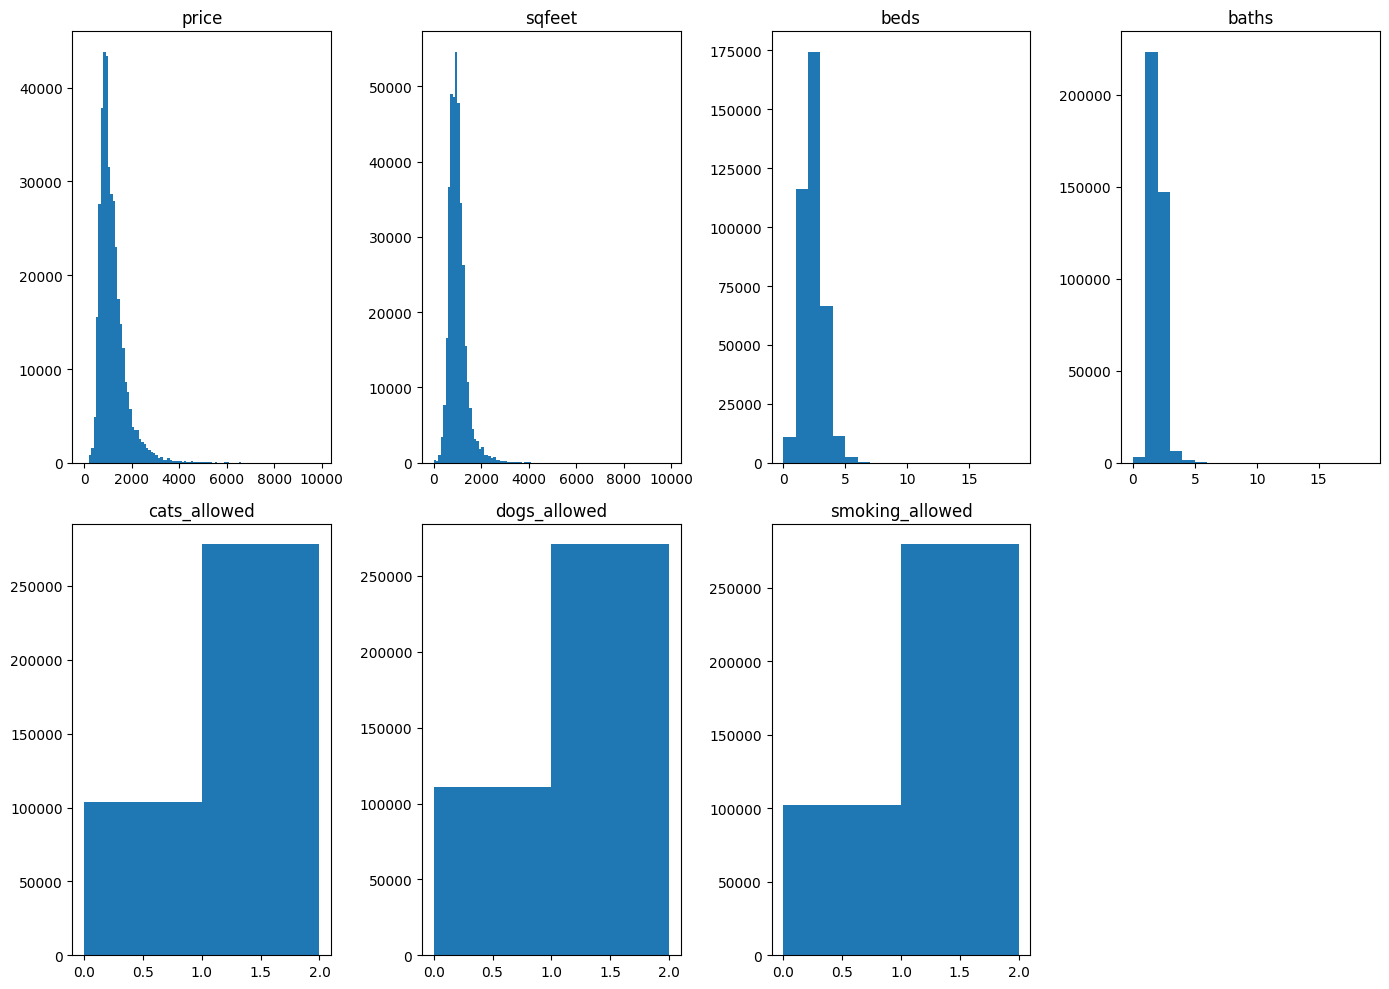

In [17]:
# Some histograms for our numeric features

numeric_columns = data.select_dtypes(include = np.number).columns
number_num_col = numeric_columns.size
print(numeric_columns)

import matplotlib.pyplot as plt

col_to_bins = {'price': [100* i for i in range(0,100)],
                'sqfeet' : [100* i for i in range(0,100)],
                'beds' : [1*i for i in range(0,20)],
                'baths' : [1*i for i in range(0,20)],
                'cats_allowed' : [0,1,2],
                'dogs_allowed' : [0,1,2],
                'smoking_allowed': [0,1,2]}

def histograms(db : pd.DataFrame, col_to_bins : dict, size : tuple[int,int]):
    chosen_columns = col_to_bins.keys()
    
    n_cols = 4
    n_total = len(chosen_columns)
    n_rows = int(np.ceil(n_total/ n_cols))
    
    fig, ax = plt.subplots(n_rows,n_cols, figsize = size)
    ax = np.atleast_2d(ax) # when row = 1 ensures 2d shape

    for idx, col in enumerate(chosen_columns):
        if col not in col_to_bins.keys(): 
            continue
        
        i,j = divmod(idx, n_cols)
        ax[i,j].hist(db[col], bins = col_to_bins[col])
        ax[i,j].set_title(col)
        
    for k in range(n_total, n_cols*n_rows):
        i,j = divmod(k, n_cols)
        ax[i,j].axis('off')
    
    plt.tight_layout()
    plt.show()
    return
histograms(data, col_to_bins, size =(14,10))
    

    


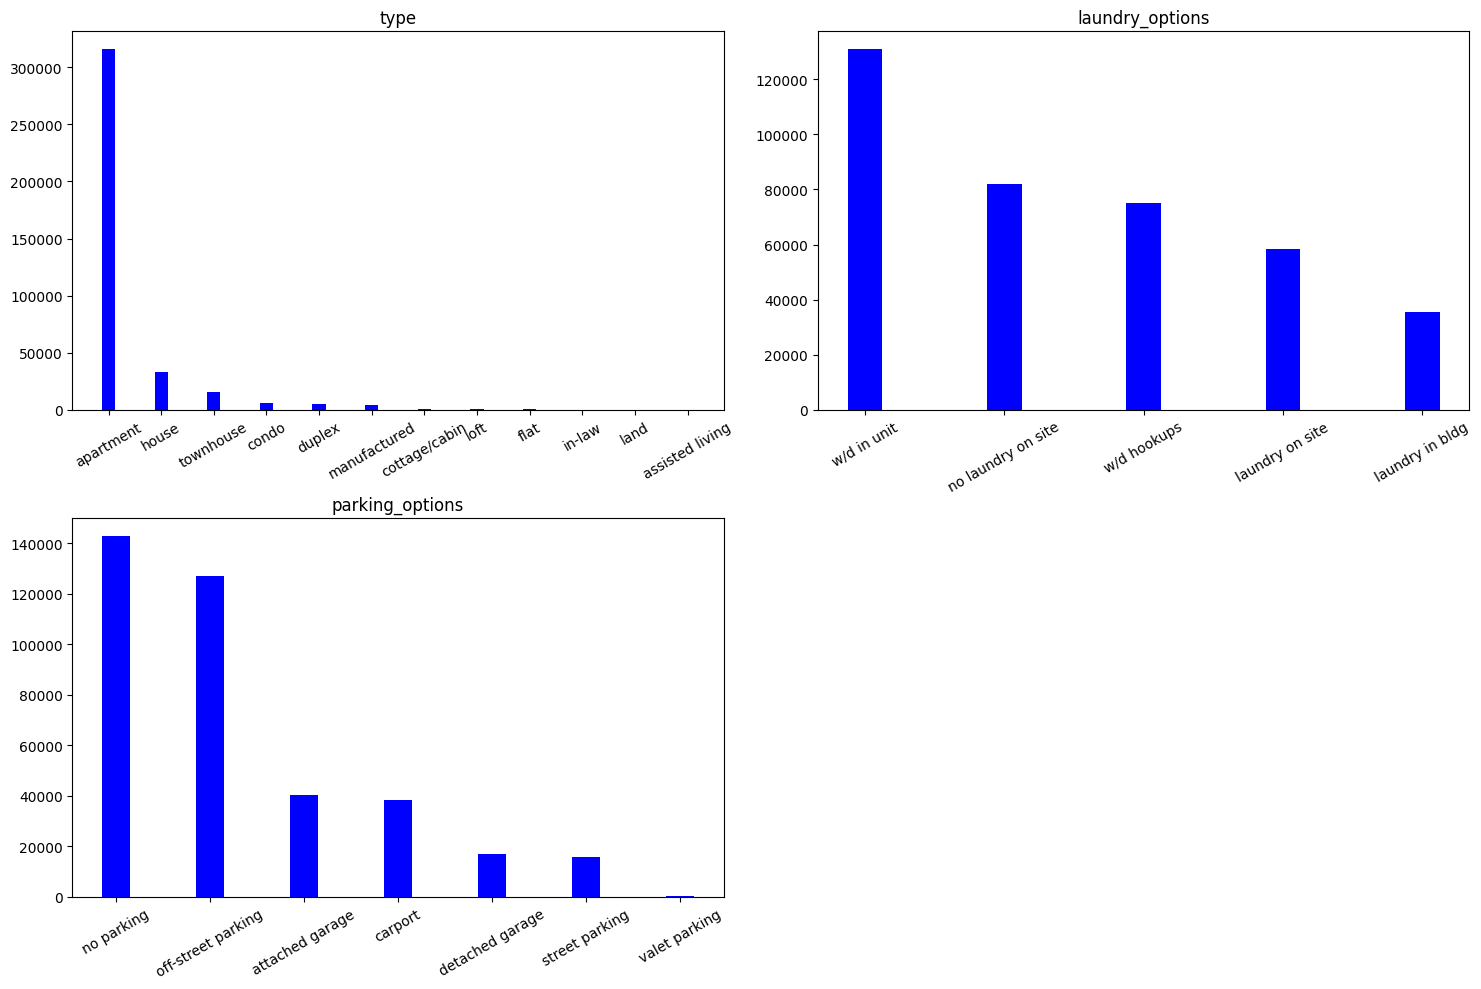

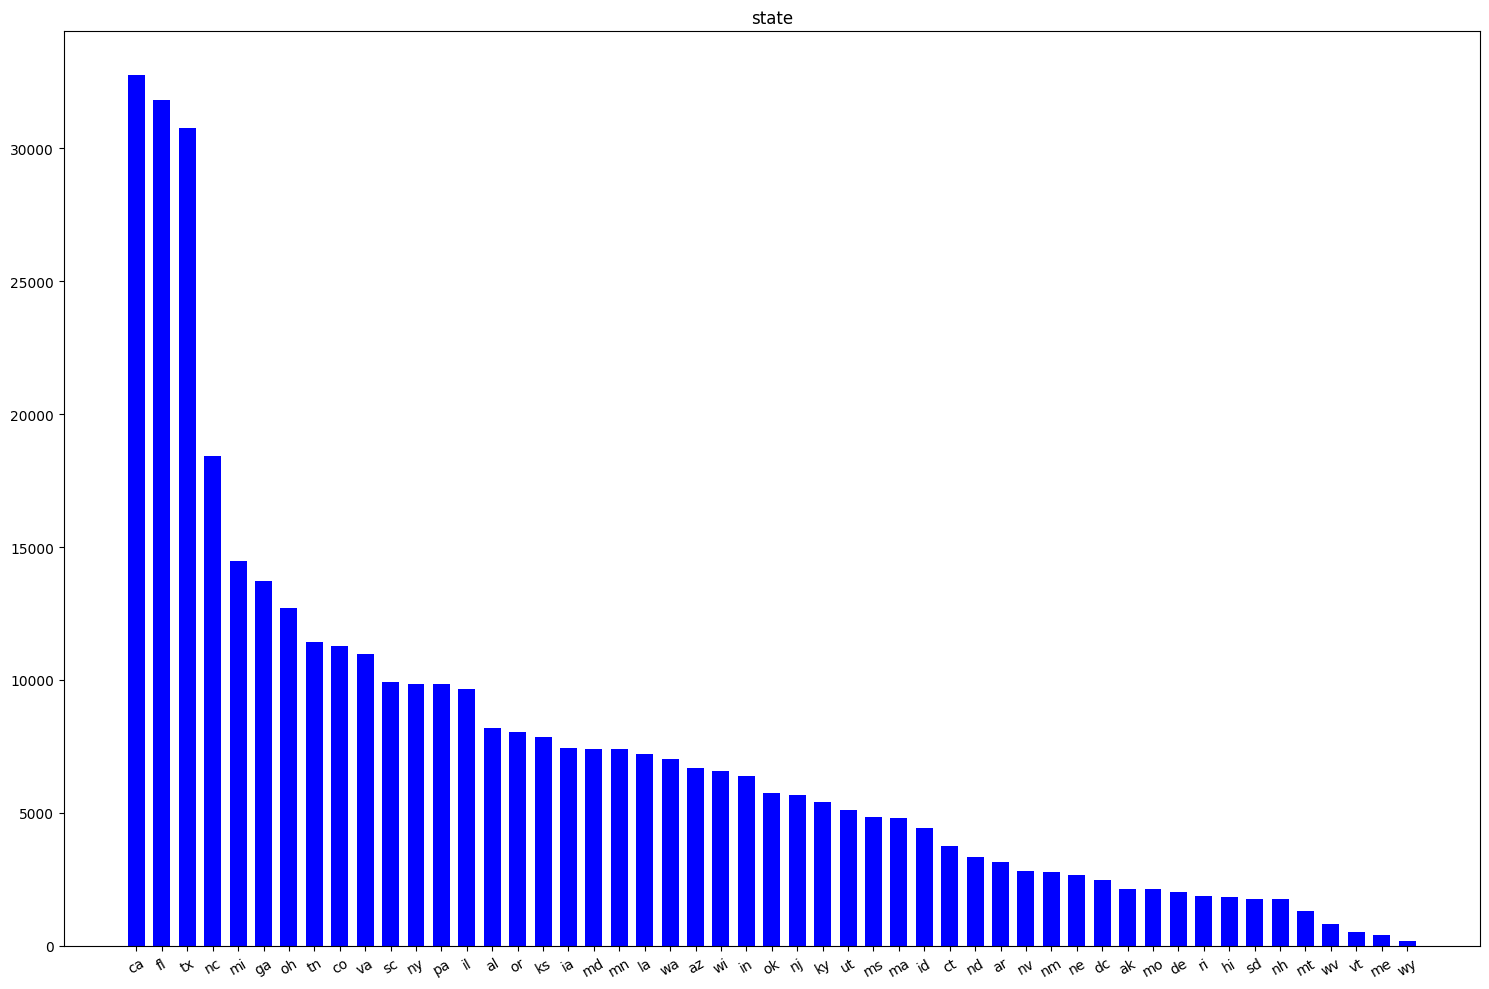

In [18]:

def BarChart(db: pd.DataFrame, n_cols, cols : list[str], col_to_width : dict, col_to_color : dict, tik_scale = 2, tik_rotate = 0, fig_size = (10,10)):
    n_cols = n_cols
    n_total = len(cols)
    n_rows = int(np.ceil(n_total/n_cols))
    fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = fig_size)
    ax = np.atleast_2d(ax)

    for idx,col in enumerate(cols):
        to_bar = db[col].value_counts()
        
        
        subjects = to_bar.index
        values = to_bar.values
        tik = np.asarray([i for i in range(len(subjects))]) * tik_scale
        
        
        i,j = divmod(idx,n_cols)
        ax[i,j].bar(tik, values,
                    width = col_to_width.get(col, 0.8), # default width of bars is 0.8
                    color = col_to_color.get(col, 'blue')) #default color of bars is blue
        
        ax[i,j].set_title(col)
        ax[i,j].set_xticks(tik)
        ax[i,j].set_xticklabels(subjects, rotation = tik_rotate)
    
    for k in range(n_total, n_cols * n_rows):
        i,j = divmod(k, n_cols)
        ax[i,j].axis('off')
    plt.tight_layout()
    plt.show()
    return None
    
columns = ['type','laundry_options', 'parking_options']
n_cols =2
col_to_width = {'type':5,'laundry_options' : 5, 'parking_options': 6}
tik_scale = 20
tik_rotate = 30
col_to_color = {'type' : 'blue','laundry_options' : 'blue', 'parking_options' : 'blue'}

BarChart(data, cols= columns, n_cols=n_cols, col_to_width=col_to_width, col_to_color=col_to_color, tik_scale=tik_scale, tik_rotate = tik_rotate, fig_size=(15,10))

    
BarChart(data, cols =['state'], n_cols=1, col_to_width = {'state': 2}, col_to_color = {'state' : 'blue'}, tik_scale = 3,tik_rotate =30, fig_size=(15,10))


A few interesting observations:

1) While we could have noted this earlier, it is worth asking what is the difference between 'laundry on site' and 'laundry in building'. It might be worth it to combine these two categories.
2) Most of the house types here are 'apartment'.
3) Since most of the house types are 'apartment', this might be the reason no parking is the most common parking option.
4) Most instances in this data set have a state of California, Florida, or Texas-- a reason for this might be population distribution in the United States.

Next we display some box plots for some of our numeric data (excluding 'cats_allowed', 'dogs_allowed', and 'smoking_allowed' as these are binary).


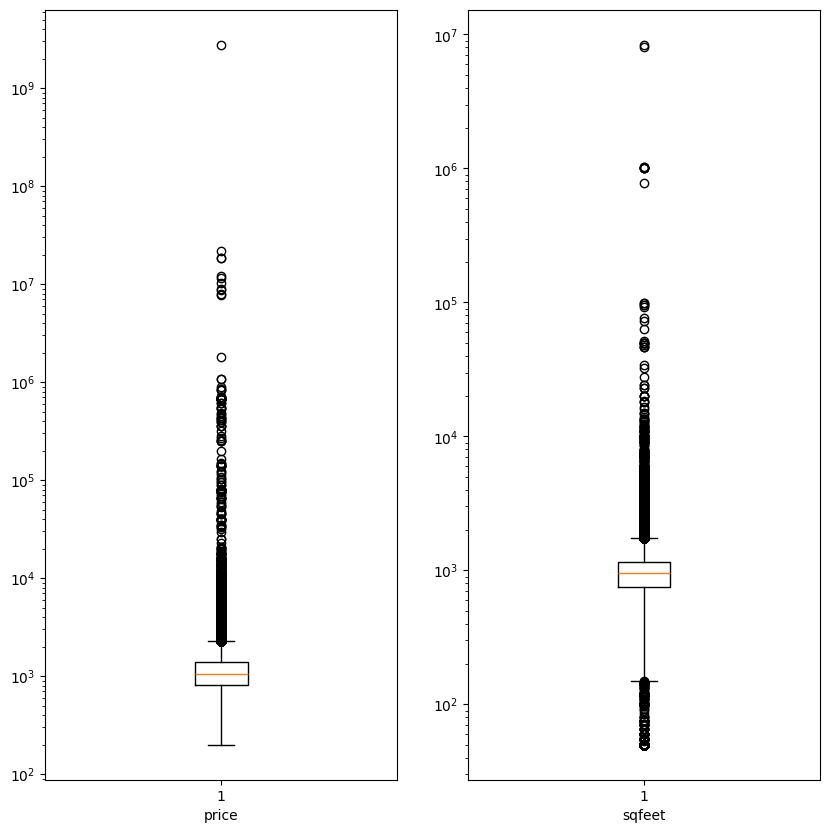

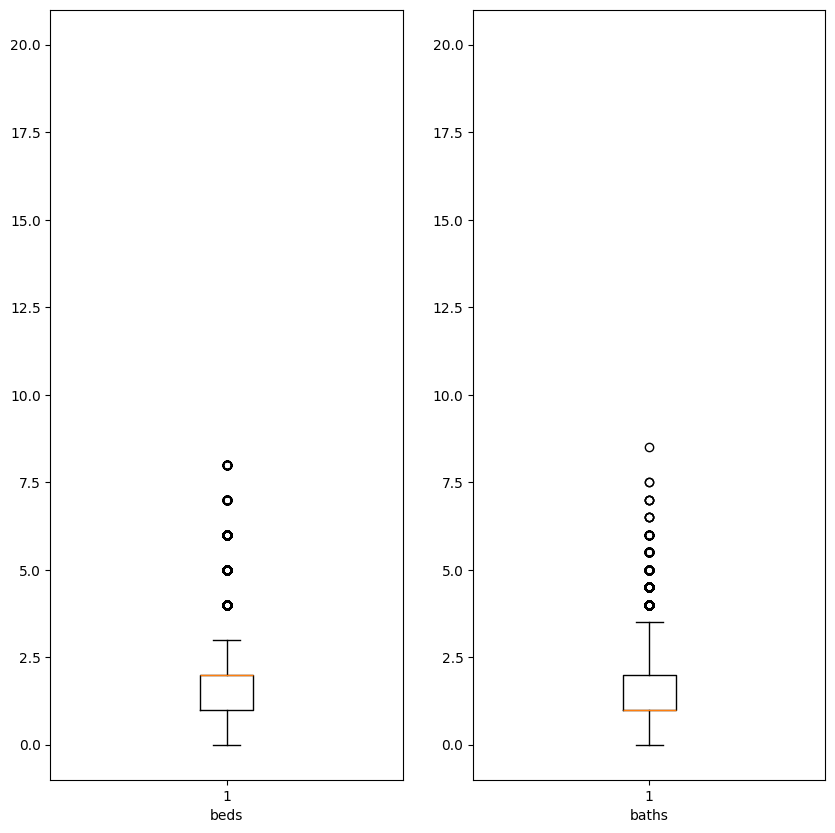

In [19]:
    
def BoxPlots(db : pd.DataFrame, cols : list[str], n_cols: int, y_scale , col_to_yticks : dict = {}, figsize = (10,10), max_min : tuple[int,int] = None):
    
    n_total = len(cols)
    n_rows = int(np.ceil(n_total/n_cols))
    fig, ax = plt.subplots(n_rows, n_cols, figsize= figsize)
    ax = np.atleast_2d(ax)
    for idx, col in enumerate(cols):
        if not pd.api.types.is_numeric_dtype(db[col]):
            raise TypeError(f"dtype of {col} is not numeric")
        i,j = divmod(idx, n_cols)
        
        ax[i,j].boxplot(data[col])
        ax[i,j].set_yscale(y_scale)
        ax[i,j].set_xlabel(col)
        
        if max_min is not None:
            y_min = max_min[0]
            y_max = max_min[1]
            ax[i,j].set_ylim(y_min-1, y_max+1)
        if col in col_to_yticks.keys():
            ax[i,j].set_yticks(col_to_yticks[col])  
    for k in range(n_total, n_rows*n_cols):
        i,j = divmod(k, n_cols)
        ax[i,j].axis('off')
    
    plt.show()
    
columns = ['price','sqfeet']

BoxPlots(data, columns, n_cols =2, y_scale ='log')

columns =['beds','baths']

BoxPlots(data, columns, n_cols =2, y_scale ='linear', max_min=(0,20))



## Observations on the box plots: 

1) There are no *lower* outliers (in terms of the IQR outlier method) for 'price', 'beds' and 'baths'. This is slightly shocking for the 'price' feature. This is certainly less shocking for the 'beds' and 'baths' features.
2) There are plenty of *upper* outliers (in terms of the IQR outlier method) for 'price' and 'sqfeet'. 

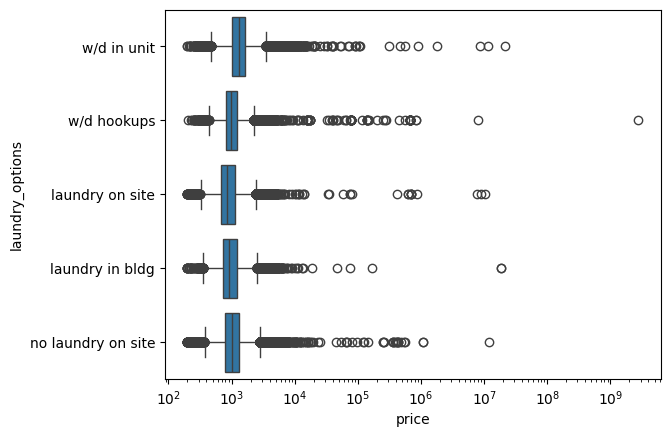

In [20]:
import seaborn as sns

sns.boxplot(data = data, x='price', y='laundry_options',log_scale = True)
plt.show()

## Observation on 'price' vs 'laundry_options'

1) It is rather odd that the median of the 'price' feature of instance with no laundry on site is larger than that of it's laundry on site and laundry in bldg counterparts.

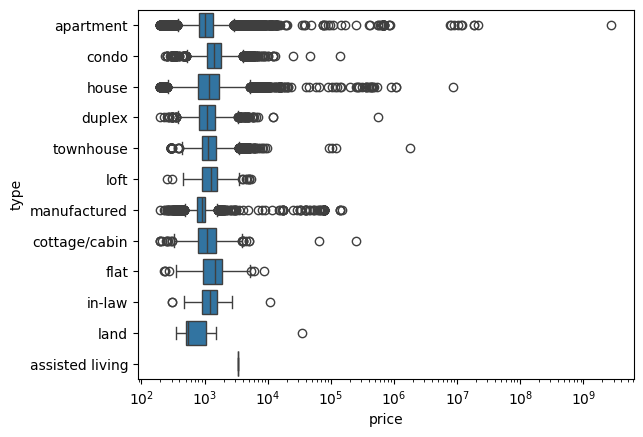

In [21]:
sns.boxplot(data=data, x= 'price', y='type', log_scale=True)
plt.show()

## Observations about price vs type

1) It is very odd that the instance with the highest maximum price is an apartment. We also keep in mind that this maximum price is in the billions. More than just an outlier this likely represents truly bad data.

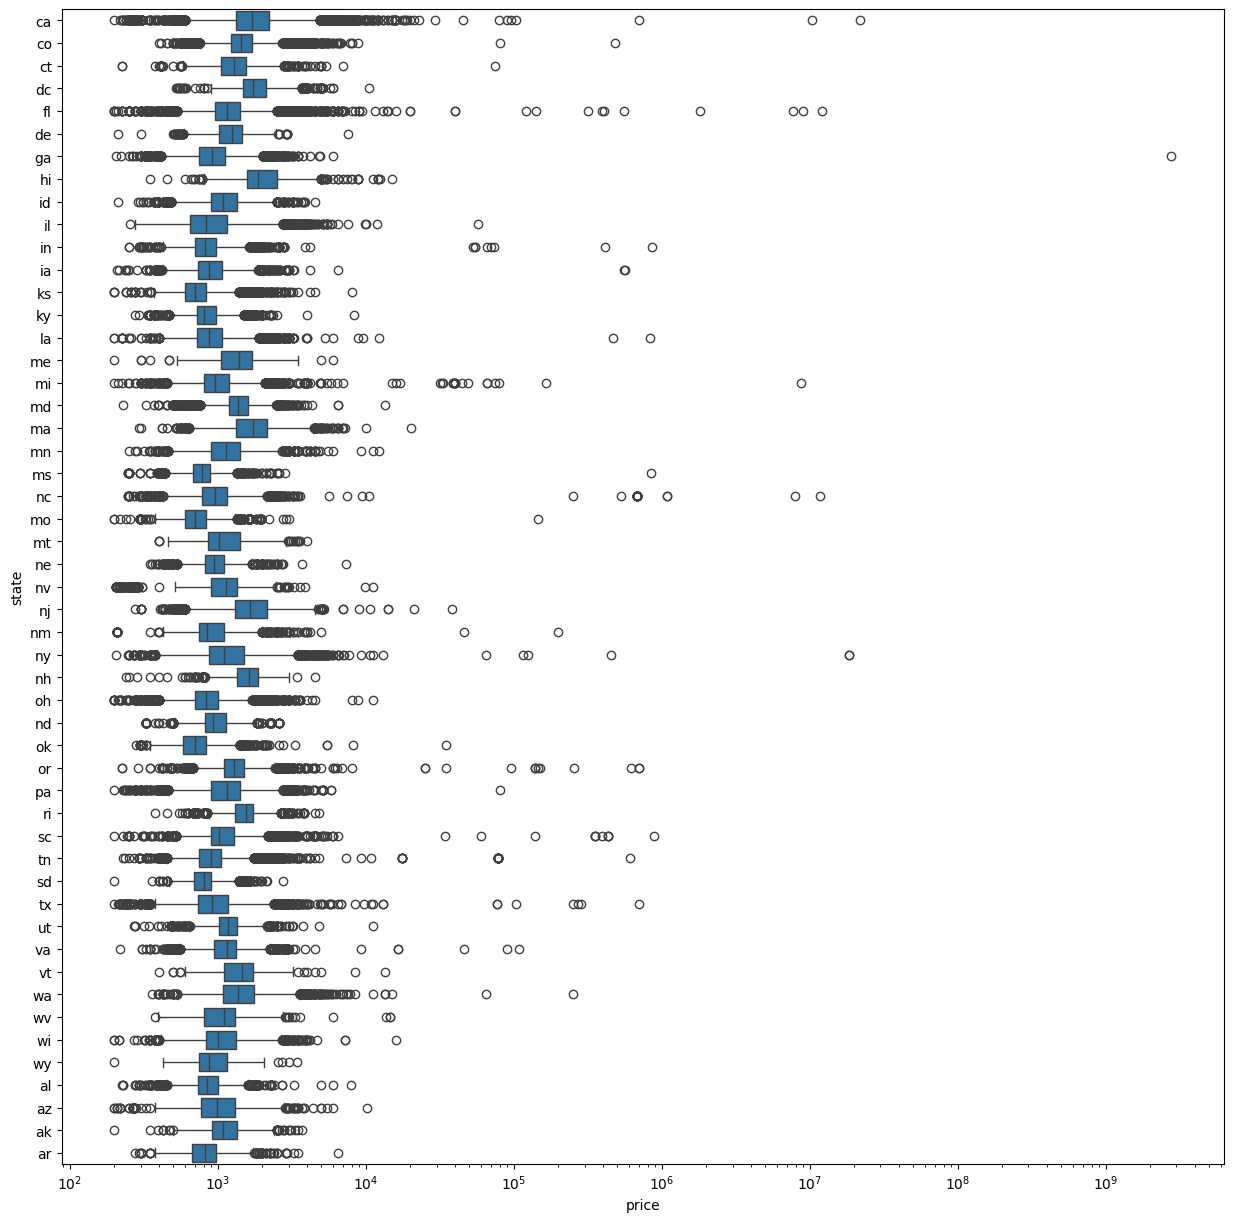

In [22]:
plt.figure(figsize =(15,15))
sns.boxplot(data = data, x ='price', y = 'state', log_scale = True)
plt.show()

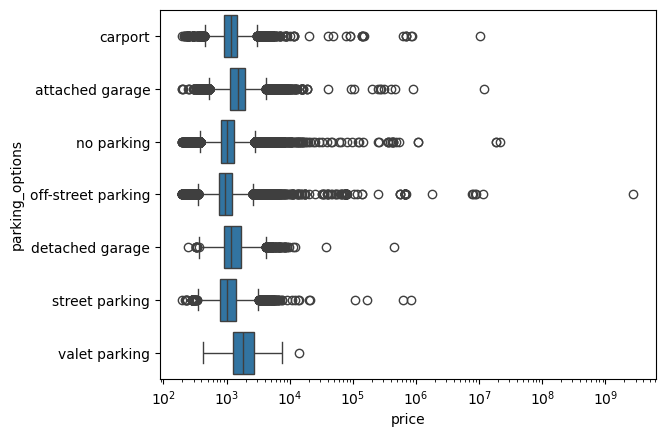

: 

: 

: 

: 

: 

In [ ]:
sns.boxplot(data = data, x ='price', y='parking_options', log_scale = True)
plt.show()

## Observations on 'price' vs 'parking_options'

1) It is interesting that the price of homes with no parking has a greater median than those of its off-street parking counterpart.

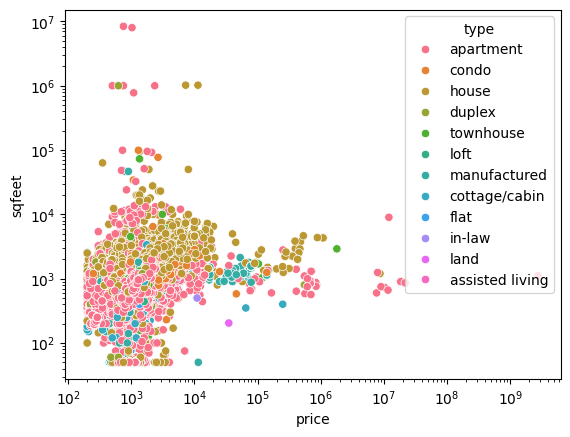

In [23]:
p =sns.scatterplot(data = data, x ='price', y ='sqfeet', hue = 'type')
p.set_xscale('log')
p.set_yscale('log')
plt.show()

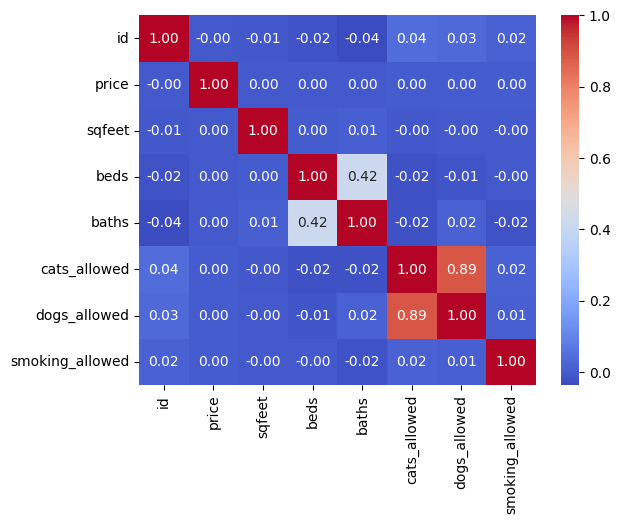

In [24]:
cor_mat = data.select_dtypes(include = np.number).corr()
sns.heatmap(cor_mat, annot = True, cmap = 'coolwarm', fmt =".2f")
plt.title =('Correlation Matrix Heatmap')
plt.show()

In [25]:
import scipy

scipy.stats.skew(data.select_dtypes(include = np.number), axis =0) #Does not tell us which number refers to which feature.

def skewness(db : pd.DataFrame, axis :int  = 0, bias : bool = False, na_method = 'drop'):
    # add more na_methods later
    db = db.copy()
    db = db.select_dtypes(include= np.number) # Gets rid of nonnumeric columns
    skewdic = dict({})
    for col in db.columns:
        db[col] = db[col].dropna()
        N = db[col].value_counts().sum()
        mean = db[col].mean()
        std = db[col].std()
        g1_series = db[col].map(lambda x : (x-mean)**3)
        skewdic[col] =  (1/N)*(1/std**3) * (g1_series.sum())
        if not bias:
            skewdic[col] = [skewdic[col]]
        elif bias:
            skewdic[col] = [(np.sqrt(N*(N-1)))/(N*(N-2))*skewdic[col]]
        
    skewdb = pd.DataFrame(skewdic)
    skewdb['Skewness'] =['Skewness']
    
    
    return skewdb.set_index('Skewness')

skewness(data)


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed
Skewness,,,,,,,,
Skewness,-1.098814,617.637367,408.359495,281.353431,10.221493,-1.027951,-0.92249,-1.046252


From the 'skewness' table above, we see that 'price', 'sqfeet', 'beds', and 'baths' are heavily right-skewed -- the first three are extremely so.
Our next step is to apply a logarithmic transformation to the 'price', 'sqfeet', 'beds', and 'baths' columns and then see if these columns (after transformation) are close to representing normal distrubuted data. For the columns that are close to 'normal' we apply Z-score method for detecting  outliers and for columns that are not close to 'normal', we apply the IQR method.

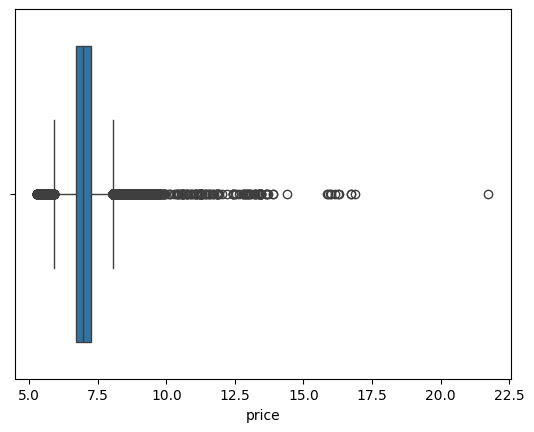

In [26]:
columns_to_log = ['price','sqfeet','beds','baths']

def LogTransform( db : pd.DataFrame, cols : list[str], h_shift :float = 0):
    data = db.copy()
    numeric_check = [pd.api.types.is_numeric_dtype(data[col]) for col in cols]
    if False in numeric_check:
        assert TypeError(f'The dtype of {col} is not numeric')
    
    for col in cols:
        data[col] = data[col].apply(lambda x : np.log(x + h_shift) if x+h_shift !=0  else x)
    return data
            
            
log_data = LogTransform(data, cols = columns_to_log)

log_data['price'].max() 

sns.boxplot(log_data, x= 'price')
plt.show()
#BoxPlots(data,['price','sqfeet'], n_cols =2, y_scale ='log' )
        

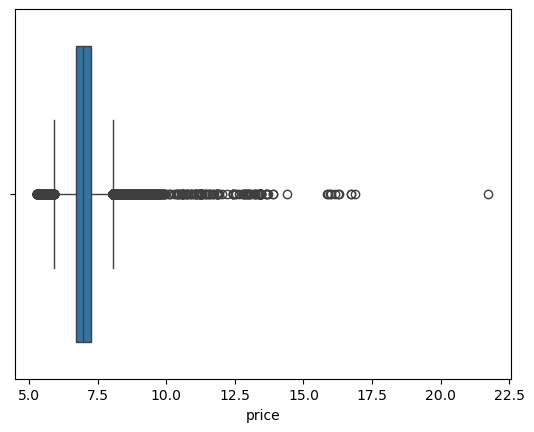

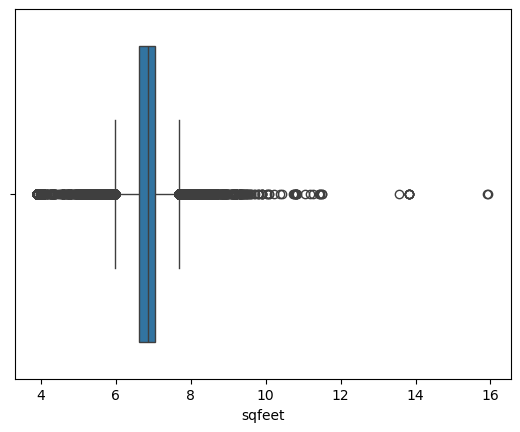

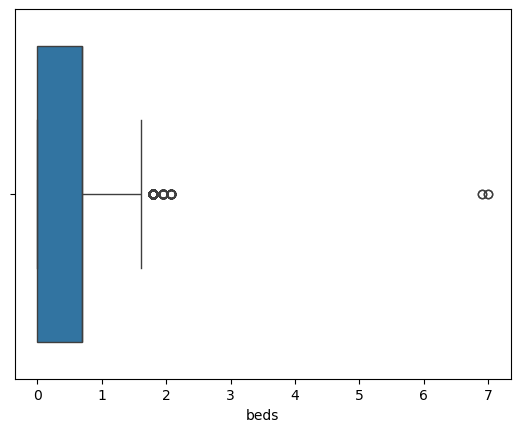

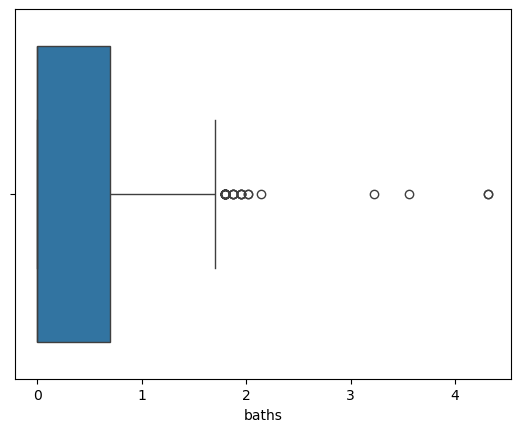

: 

: 

: 

: 

: 

In [ ]:
sns.boxplot(log_data, x= 'price')
plt.show()
sns.boxplot(log_data, x='sqfeet')
plt.show()
sns.boxplot(log_data, x='beds')
plt.show()
sns.boxplot(log_data, x='baths')
plt.show()

# Can do this nicely with fig,ax subplot since these are axes.

                                     price     sqfeet       beds      baths  \
Standard deviation range                                                      
plus or minus 1 std's from mean  72.249101  75.929191  45.664912  59.313909   
plus or minus 2 std's from mean  95.871719  95.122552  99.324701  97.809339   
plus or minus 3 std's from mean  99.328631  98.839576  99.978520  99.892340   

                                 type  cats_allowed  dogs_allowed  \
Standard deviation range                                            
plus or minus 1 std's from mean   NaN     72.856555     70.941987   
plus or minus 2 std's from mean   NaN    100.000000    100.000000   
plus or minus 3 std's from mean   NaN    100.000000    100.000000   

                                 smoking_allowed  laundry_options  \
Standard deviation range                                            
plus or minus 1 std's from mean        73.176654              NaN   
plus or minus 2 std's from mean       100.000000   

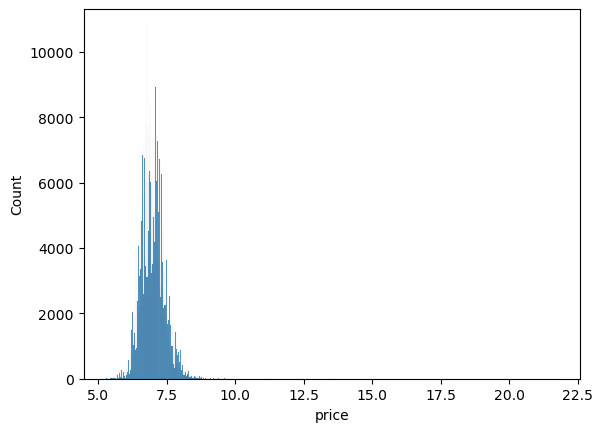

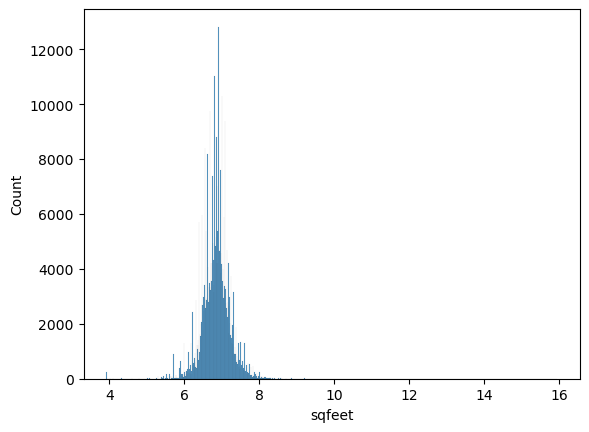

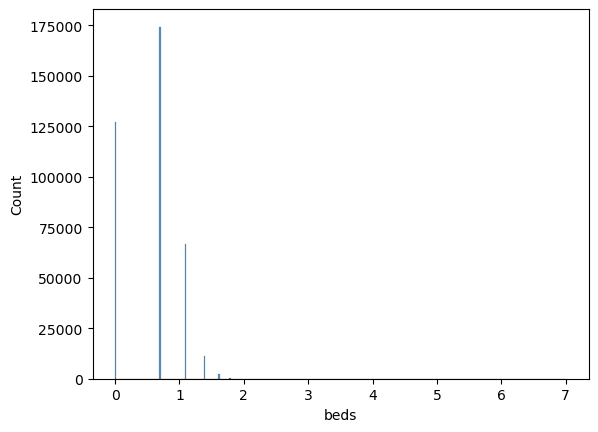

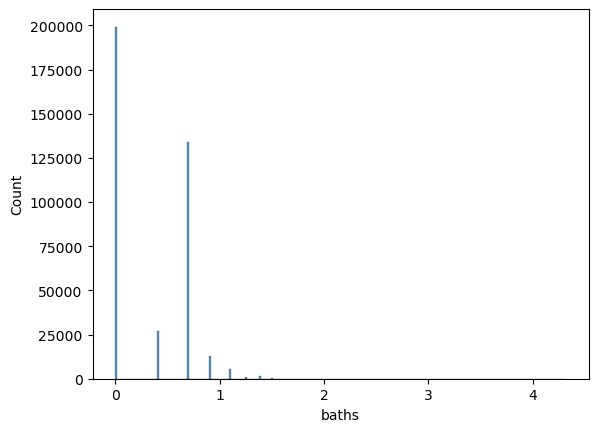

: 

: 

: 

: 

: 

In [ ]:
print(prepro.NormalMetrics(log_data, 3))
sns.histplot(log_data, x='price')
plt.show()
sns.histplot(log_data, x='sqfeet')
plt.show()
sns.histplot(log_data, x='beds')
plt.show()
sns.histplot(log_data, x='baths')
plt.show()



In [ ]:
skewness(log_data)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed
Skewness,,,,,,,
Skewness,1.469654,-0.048982,-0.025549,0.435496,-1.027951,-0.92249,-1.046252


: 

: 

: 

: 

: 

While IQRMetrics indicated 'price' is close to normal, we see that it is still moderately right-skewed. As IQRMetrics show us that 'sqfeet', 'beds' and 'baths' are not close to normal, we will settle with using the IQR method in detecting outliers in their respective columns in 'log_data'. Next, after flagging these outliers, we handle the outliers in the pre-transformed dataset 'data'. 

In [ ]:
#Set up masks/flags based on IQR outlier detection method
IQRFlag = prepro.IQRFlag(log_data,invert=False)


#Check upper bound and lower bounds for non-outliers:
upper_lower ={}
columnIQR = ['price', 'sqfeet', 'beds','baths']
for col in columnIQR:
    filtered_col= data[col][IQRFlag['Flag IQR for '+col]]
    upper = filtered_col.max()
    lower = filtered_col.min()
    upper_lower[col] = [upper,lower]
up_low = pd.DataFrame(upper_lower)


# Check extreme bounds for outliers 

extreme_bounds = {}
for col in columnIQR:
    filtered_col= data[col][~IQRFlag['Flag IQR for '+col]]
    upper = filtered_col.max()
    lower = filtered_col.min()
    extreme_bounds[col] =[upper, lower]

ext_bounds = pd.DataFrame(extreme_bounds)

print(up_low)
print(ext_bounds)

data['price'].quantile(.98)



   price  sqfeet  beds  baths
0   3146    2183     5    5.5
1    363     396     0    0.0
        price   sqfeet  beds  baths
0  2768307249  8388607  1100   75.0
1         200       50     6    6.0


2850.0

: 

: 

: 

: 

: 

We make the following observations

1) For the 'price' column the maximum price of a non-outlier is 3146 - originally I thought this would be too low but it turns out to be very close to the 98th percentile (2850). 
2) For the 'price' column the minimum price of a non-outlier is 363, which is low. However, this is not inconceivable.
3) For the 'sqfeet' column the maximum square footage of a non-outlier is 2183-- given that the data at hand has apartment as the most common type, this is not unreasonable for a maximum square footage for a non-outlier. However, this maximum value might be unreasonable for houses. Also the 98th quantile for the original 'sqfeet' column is 2052, so maximum non-outlier is above the 98th percentile. 
4) For the 'sqfeet' column the minimum square footage of a non-outlier is 396. This seems reasonable especially for studio apartments.
5) The maximum and minimum values for the non-outliers in the 'beds' and 'baths' columns are reasonable. However, there are possibly houses (i.e. mansions) with considerably more 5 beds and/or  5.5 baths. Also the 99th quantile for the orginal 'beds' and 'baths' columns are 4 and 3, respectively; so the maximum non-outliers are above the 99th percentile.

With the above observations, we will delete outliers in each columns given that the maximums of the non-outliers of each of these columns are in the 98th percentile for their respective features.

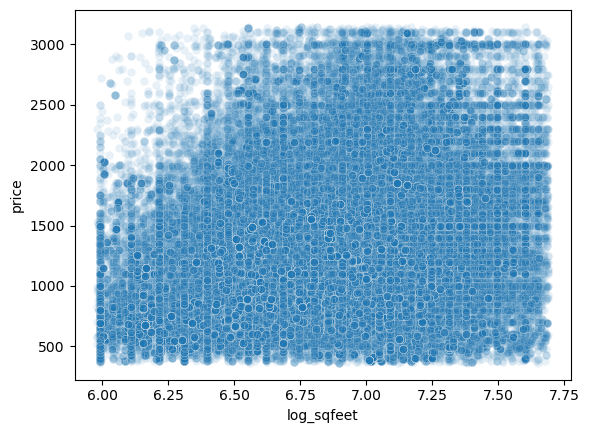

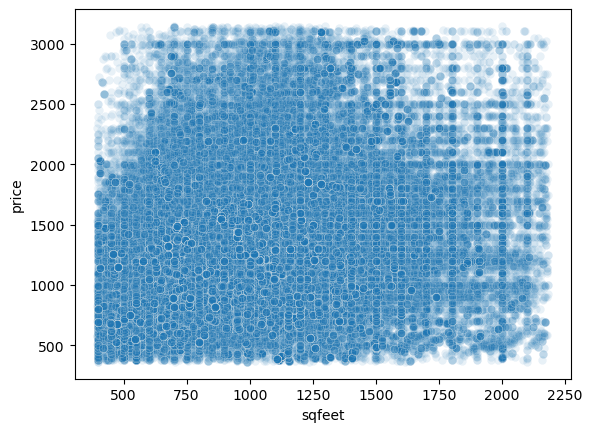

: 

: 

: 

: 

: 

In [ ]:
# Delete outliers

data = data.copy()

columnIQR = ['price', 'sqfeet', 'beds','baths']
for col in columnIQR:
    data[col]= data[col][IQRFlag['Flag IQR for '+col]]
    
data.describe()
data['price'].size
data['price'].size < db['price'].size

# log(sqfeet) vs price histogram
data['log_sqfeet'] = np.log(data['sqfeet']) 
sns.scatterplot(data = data, x ='log_sqfeet', y ='price',alpha =.1)
plt.show()
sns.scatterplot(data = data, x = 'sqfeet', y = 'price', alpha = .1)
plt.show()

 Next, we do feature engineering. 

1. We combine the features ``'cats_allowed'``, ``'dogs_allowed'``, ``'smoking_allowed'`` features by adding their values. Our justification here is that each of these features indicate a lifestyle choice.


2. We will apply a log transform to    ``'sq_feet'``- the reasoning here is that the price of a house typically isn't linear with respect to square footage; instead it increases quickly at the beginning and usually starts to taper off, like a logarithmic curve. We call this new transformed column ``'log_sqfeet'``.

3. We will combine the ``'beds'`` and ``'baths'`` features by adding their values and divide the sum by the value of ``'log_sqfeet'``. Our justification here is that the number of rooms (beds + baths for our purposes) divided by the square footage is an indicator of how the house is laid out. In particular a lower value in this new combined feature indicates that the house has more 'living room' than a higher value, which might be a useful insight. Moreover, it might be a good idea to scale the ``'beds'`` and ``'baths'`` column to higher values so that the resulting new columns values are not small numbers and can be more easily compared.

4. We will hotkey encode ``'type'``, ``'laundry_options'``, ``'parking_options'``, ``'state'``


We will standardize each the ``'price'`` and ``'sqfeet/beds+baths'`` columns (for linear regression)

The following code block will enact these changes

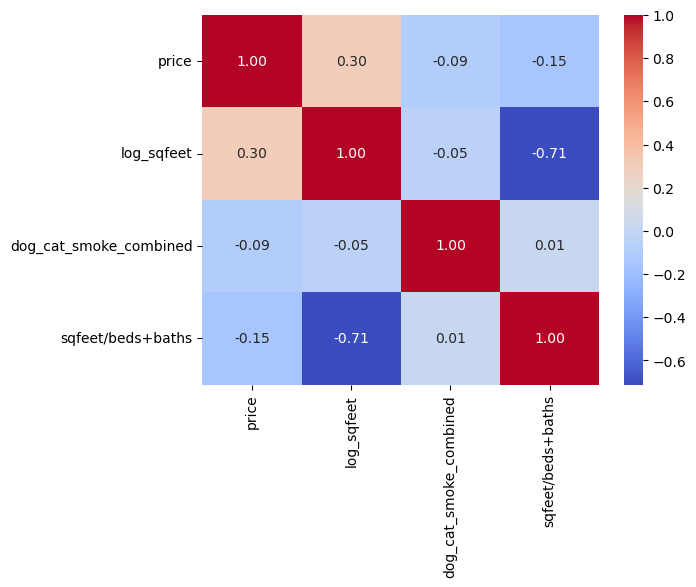

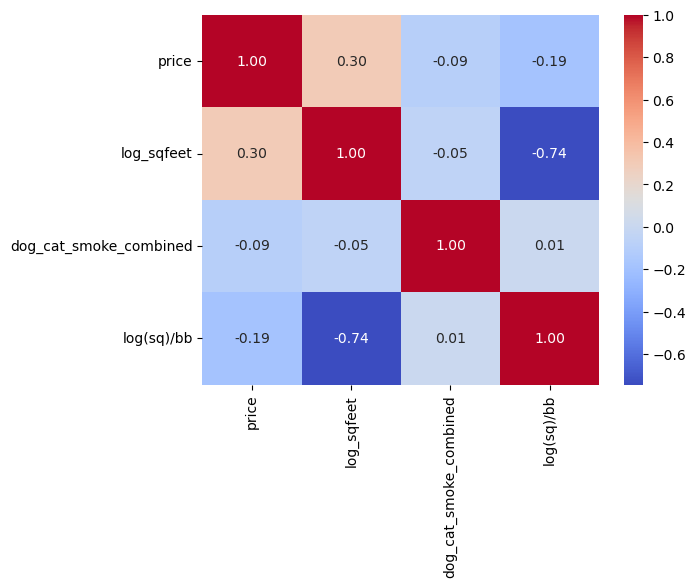

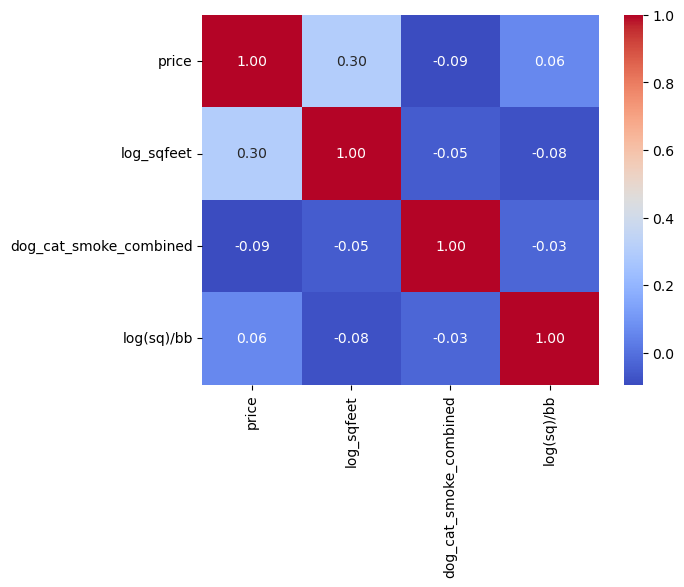

: 

: 

: 

: 

: 

In [ ]:
data['dog_cat_smoke_combined'] = data['dogs_allowed'] + data['cats_allowed'] + data['smoking_allowed']
data['sqfeet/beds+baths'] = np.log(data['sqfeet'])/(data['beds'] + data['baths'])

standard = prepro.StandardizeColumns(columns = ['sqfeet/beds+baths'])
data = standard.fit_transform(data)

#Hot key encode

def HotKey(db : pd.DataFrame, cols : list[str]):
    data = db.copy()
    for col in cols:
        for idx, val in enumerate(data[col].unique()):
            data[col] = data[col].replace(to_replace = val, value = idx)
    return data

data = HotKey(data, cols = ['type','laundry_options','parking_options','state'])
# may need a way to remember which key corresponds to which entry.

corr_matrix = data[['price','log_sqfeet', 'dog_cat_smoke_combined', 'sqfeet/beds+baths']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt =".2f")
plt.show()

data['log(sq)/bb'] = np.log(data['sqfeet'])/(data['baths'] * data['beds'])

corr_matrix = data[['price','log_sqfeet', 'dog_cat_smoke_combined', 'log(sq)/bb']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt =".2f")
plt.show()


data['log(sq)/b+b'] = np.log(data['sqfeet']/(data['baths'] + data['beds']))

corr_matrix = data[['price','log_sqfeet', 'dog_cat_smoke_combined', 'log(sq)/bb']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt =".2f")
plt.show()



In [ ]:
import utilities as util
test, train = util.split(data, id_column = data['id'], test_size = 0.2)


KeyError: 'id'

: 

: 

: 

: 

: 

#